스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
653/653 [==============================] - 0s 11us/step - loss: 0.0407 - acc: 0.9847 - val_loss: 0.0862 - val_acc: 0.9720
Epoch 1002/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0402 - acc: 0.9847 - val_loss: 0.0849 - val_acc: 0.9720
Epoch 1003/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0425 - acc: 0.9847 - val_loss: 0.0855 - val_acc: 0.9720
Epoch 1004/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0408 - acc: 0.9847 - val_loss: 0.0903 - val_acc: 0.9752
Epoch 1005/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0424 - acc: 0.9847 - val_loss: 0.0896 - val_acc: 0.9752
Epoch 1006/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0404 - acc: 0.9816 - val_loss: 0.0863 - val_acc: 0.9752
Epoch 1007/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0413 - acc: 0.9862 - val_loss: 0.0867 - val_acc: 0.9783
Epoch 1008/350

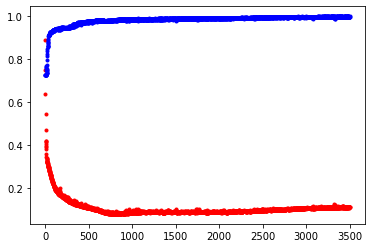

In [2]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'wine.csv'

!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

#데이터 적용
df_pre = pd.read_csv(my_data, header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()
